# Customer Segmentation System :- EDA Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv("data/processed/customer_cleaned.csv")

df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Total_Spending,Total_Purchases,Customer_For_Days
0,4297,Graduation,Married,23228.0,1,0,71,13,2,18,...,0,0,0,0,0,56,2,40,5,154
1,2811,PhD,Single,48918.0,1,1,21,52,0,9,...,0,0,0,0,0,62,3,62,5,78
2,3412,Master,Married,67381.0,0,1,67,815,8,53,...,0,0,0,0,0,74,2,957,13,530
3,9964,Graduation,Single,61825.0,0,1,56,162,50,100,...,0,0,0,0,0,46,2,424,14,326
4,10785,Graduation,Married,44078.0,1,1,17,24,1,10,...,0,0,0,0,0,56,3,41,5,10


In [4]:
df.shape

(19755, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19755 entries, 0 to 19754
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   19755 non-null  int64  
 1   Education            19755 non-null  object 
 2   Marital_Status       19755 non-null  object 
 3   Income               19755 non-null  float64
 4   Kidhome              19755 non-null  int64  
 5   Teenhome             19755 non-null  int64  
 6   Recency              19755 non-null  int64  
 7   MntWines             19755 non-null  int64  
 8   MntFruits            19755 non-null  int64  
 9   MntMeatProducts      19755 non-null  int64  
 10  MntFishProducts      19755 non-null  int64  
 11  MntSweetProducts     19755 non-null  int64  
 12  MntGoldProds         19755 non-null  int64  
 13  NumDealsPurchases    19755 non-null  int64  
 14  NumWebPurchases      19755 non-null  int64  
 15  NumCatalogPurchases  19755 non-null 

In [6]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Total_Spending,Total_Purchases,Customer_For_Days
count,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,...,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000
mean,5597.039129,51426.827740,0.450367,0.502050,48.933080,303.441407,26.723665,165.442318,37.362237,26.889091,...,0.067072,0.065401,0.013364,0.009263,0.149076,56.023488,1.952417,603.963857,12.503164,353.668641
std,3237.702237,20343.232023,0.537266,0.541143,28.736463,336.727700,40.498731,219.483081,54.514850,40.870983,...,0.250152,0.247239,0.114829,0.095803,0.356173,11.679803,0.748502,600.575051,7.150158,202.841049
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,5.000000,0.000000,0.000000
25%,2868.000000,35416.000000,0.000000,0.000000,25.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,69.000000,6.000000,180.000000
50%,5510.000000,51518.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,2.000000,396.000000,12.000000,353.000000
75%,8420.000000,68092.000000,1.000000,1.000000,74.000000,503.000000,33.000000,232.500000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,2.000000,1042.500000,18.000000,529.000000
max,11191.000000,93790.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,4.000000,2525.000000,32.000000,699.000000


**Feature Engineering**

In [9]:
# 1) Create Children count
df["Children"] = df["Kidhome"] + df["Teenhome"]

# 2) Create Total_Spending (sum of all spending categories)
df["Total_Spending"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)

# 3) Create Total_Purchases (sum of all purchase channels)
df["Total_Purchases"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

# 4) Create Family_Size (simple, intuitive)
df["Family_Size"] = df["Children"] + 2   # assuming 2 adults

# 5) Drop unnecessary columns
df = df.drop(columns=[
    "Z_CostContact",
    "Z_Revenue"
], errors='ignore')


**Age Distribution**

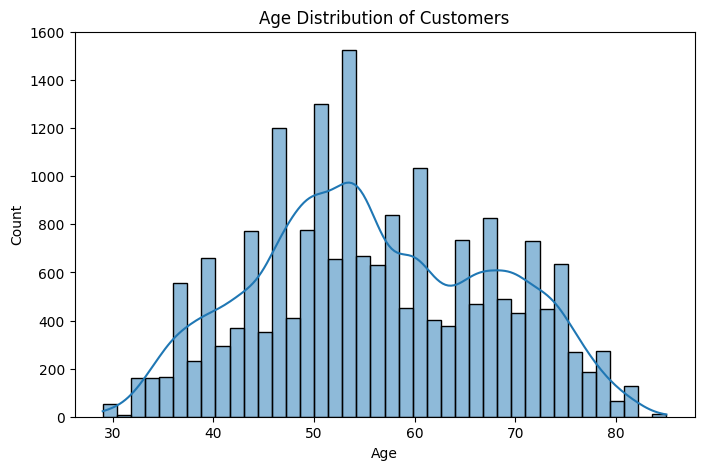

In [10]:

plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=40, kde=True)
plt.title("Age Distribution of Customers")
plt.show()


Most customers fall between 40–70 years old, meaning the customer base is largely middle-aged.

**Income Distribution**

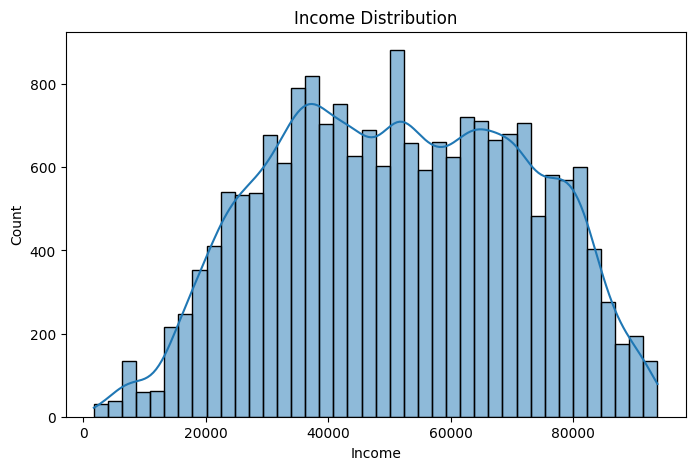

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Income"], bins=40, kde=True)
plt.title("Income Distribution")
plt.show()


Income is fairly well-distributed, with most customers earning between $20k–$80k annually.

**Total Spending**

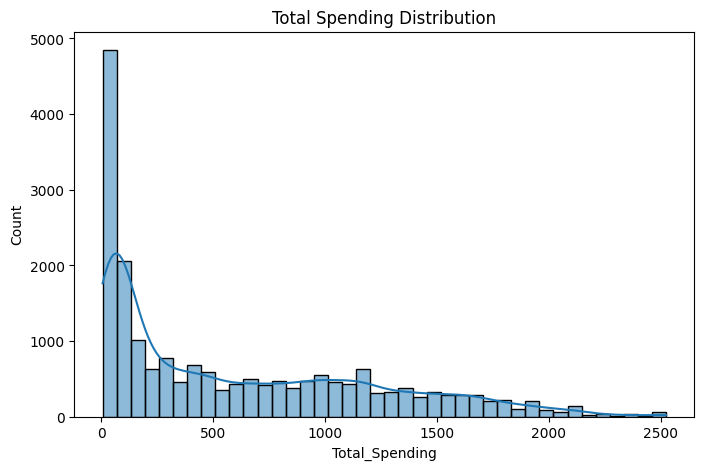

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Spending"], bins=40, kde=True)
plt.title("Total Spending Distribution")
plt.show()


Total spending is right-skewed, showing that a small group of customers spends disproportionately more.

**Income VS Total Spending**

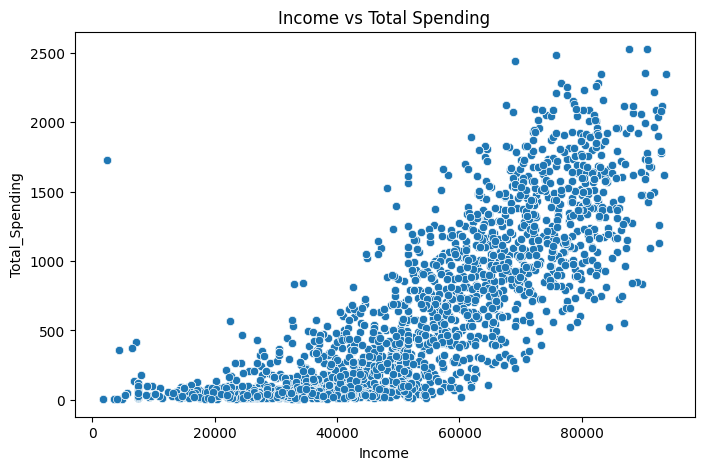

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Income"], y=df["Total_Spending"])
plt.title("Income vs Total Spending")
plt.show()


There is a clear positive relationship higher-income customers tend to spend more.

**Age VS Spending**

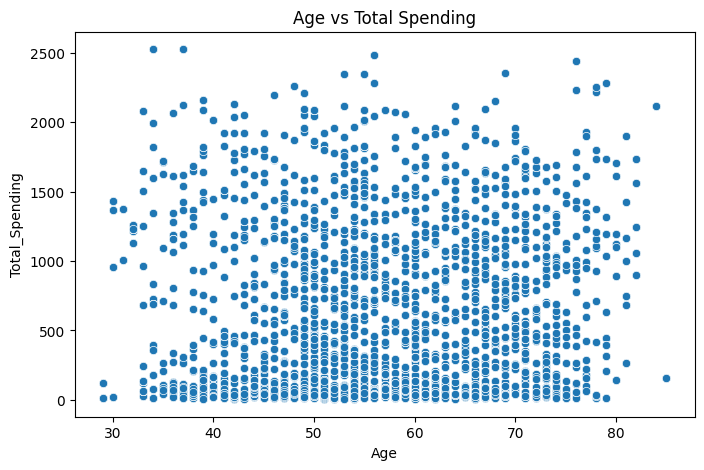

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Age"], y=df["Total_Spending"])
plt.title("Age vs Total Spending")
plt.show()


Spending does not vary much by age, meaning age alone is not a strong predictor of purchasing behavior.

**Recency vs Spending**

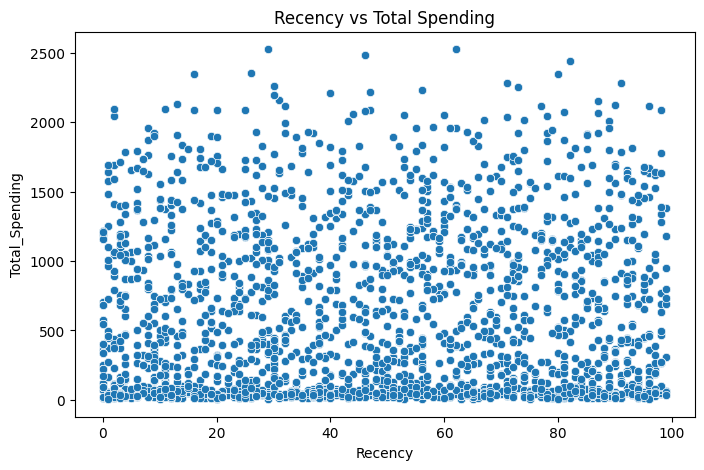

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Recency"], y=df["Total_Spending"])
plt.title("Recency vs Total Spending")
plt.show()


Customers who visited recently show no extreme difference in spending, implying recency is not tightly tied to total spending.

**Correlation Heatmap**

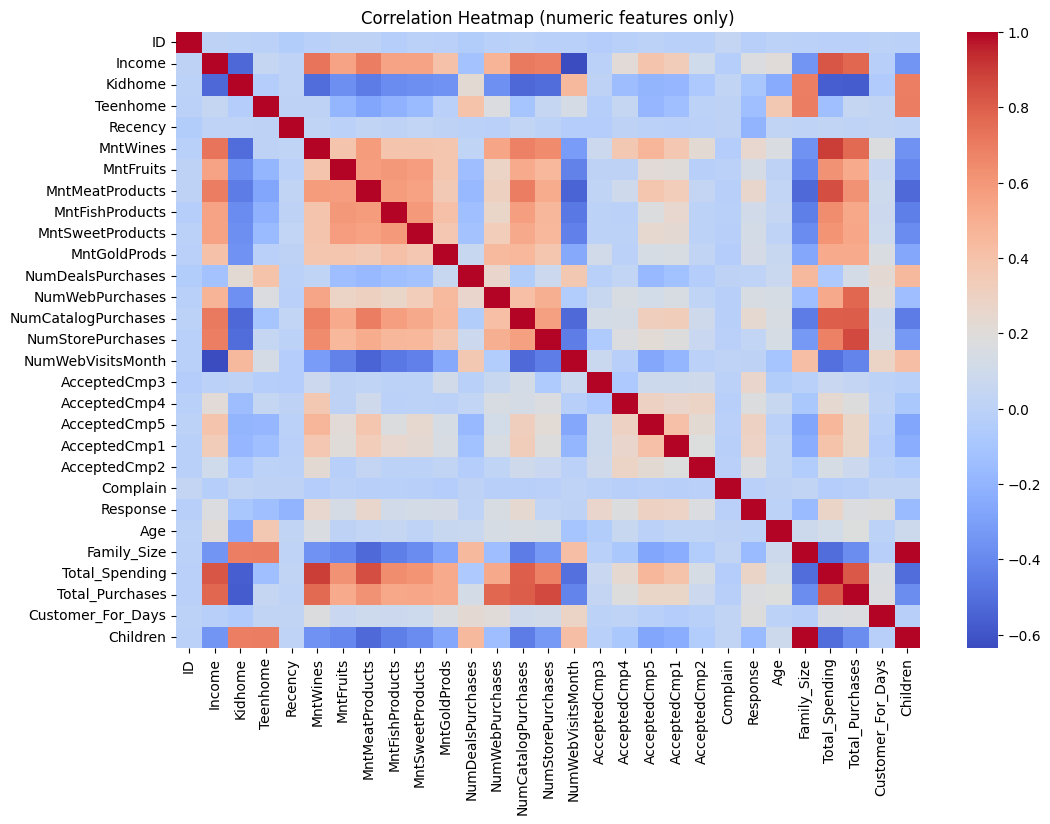

In [17]:
num_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap (numeric features only)")
plt.show()

Purchasing features show clear correlation patterns, indicating customers have consistent buying tendencies across product categories.